In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amalanfadilgaib","key":"009d19b37f6836ed0722d9a7a24b5ea2"}'}

In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition


100% 1.98G/1.98G [01:30<00:00, 26.3MB/s]
100% 1.98G/1.98G [01:30<00:00, 23.7MB/s]


In [4]:
!unzip /content/fruit-and-vegetable-image-recognition.zip

Archive:  /content/fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  


In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="Palette images with Transparency")


In [34]:
train_data = '/content/train'
val_data = '/content/validation'

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [37]:
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(224, 224),
    shuffle=True,
    batch_size=36,
    class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
    val_data,
    target_size=(224, 224),
    class_mode='categorical')

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [38]:
print("train data classes:")
print(train_generator.class_indices)

# Mencetak kelas dari validation_generator
print("val data classes:")
print(validation_generator.class_indices)

train data classes:
{'apple': 0, 'banana': 1, 'beetroot': 2, 'bell pepper': 3, 'cabbage': 4, 'capsicum': 5, 'carrot': 6, 'cauliflower': 7, 'chilli pepper': 8, 'corn': 9, 'cucumber': 10, 'eggplant': 11, 'garlic': 12, 'ginger': 13, 'grapes': 14, 'jalepeno': 15, 'kiwi': 16, 'lemon': 17, 'lettuce': 18, 'mango': 19, 'onion': 20, 'orange': 21, 'paprika': 22, 'pear': 23, 'peas': 24, 'pineapple': 25, 'pomegranate': 26, 'potato': 27, 'raddish': 28, 'soy beans': 29, 'spinach': 30, 'sweetcorn': 31, 'sweetpotato': 32, 'tomato': 33, 'turnip': 34, 'watermelon': 35}
val data classes:
{'apple': 0, 'banana': 1, 'beetroot': 2, 'bell pepper': 3, 'cabbage': 4, 'capsicum': 5, 'carrot': 6, 'cauliflower': 7, 'chilli pepper': 8, 'corn': 9, 'cucumber': 10, 'eggplant': 11, 'garlic': 12, 'ginger': 13, 'grapes': 14, 'jalepeno': 15, 'kiwi': 16, 'lemon': 17, 'lettuce': 18, 'mango': 19, 'onion': 20, 'orange': 21, 'paprika': 22, 'pear': 23, 'peas': 24, 'pineapple': 25, 'pomegranate': 26, 'potato': 27, 'raddish': 28, 

In [39]:
class_names = train_generator.class_indices
print(class_names)

{'apple': 0, 'banana': 1, 'beetroot': 2, 'bell pepper': 3, 'cabbage': 4, 'capsicum': 5, 'carrot': 6, 'cauliflower': 7, 'chilli pepper': 8, 'corn': 9, 'cucumber': 10, 'eggplant': 11, 'garlic': 12, 'ginger': 13, 'grapes': 14, 'jalepeno': 15, 'kiwi': 16, 'lemon': 17, 'lettuce': 18, 'mango': 19, 'onion': 20, 'orange': 21, 'paprika': 22, 'pear': 23, 'peas': 24, 'pineapple': 25, 'pomegranate': 26, 'potato': 27, 'raddish': 28, 'soy beans': 29, 'spinach': 30, 'sweetcorn': 31, 'sweetpotato': 32, 'tomato': 33, 'turnip': 34, 'watermelon': 35}


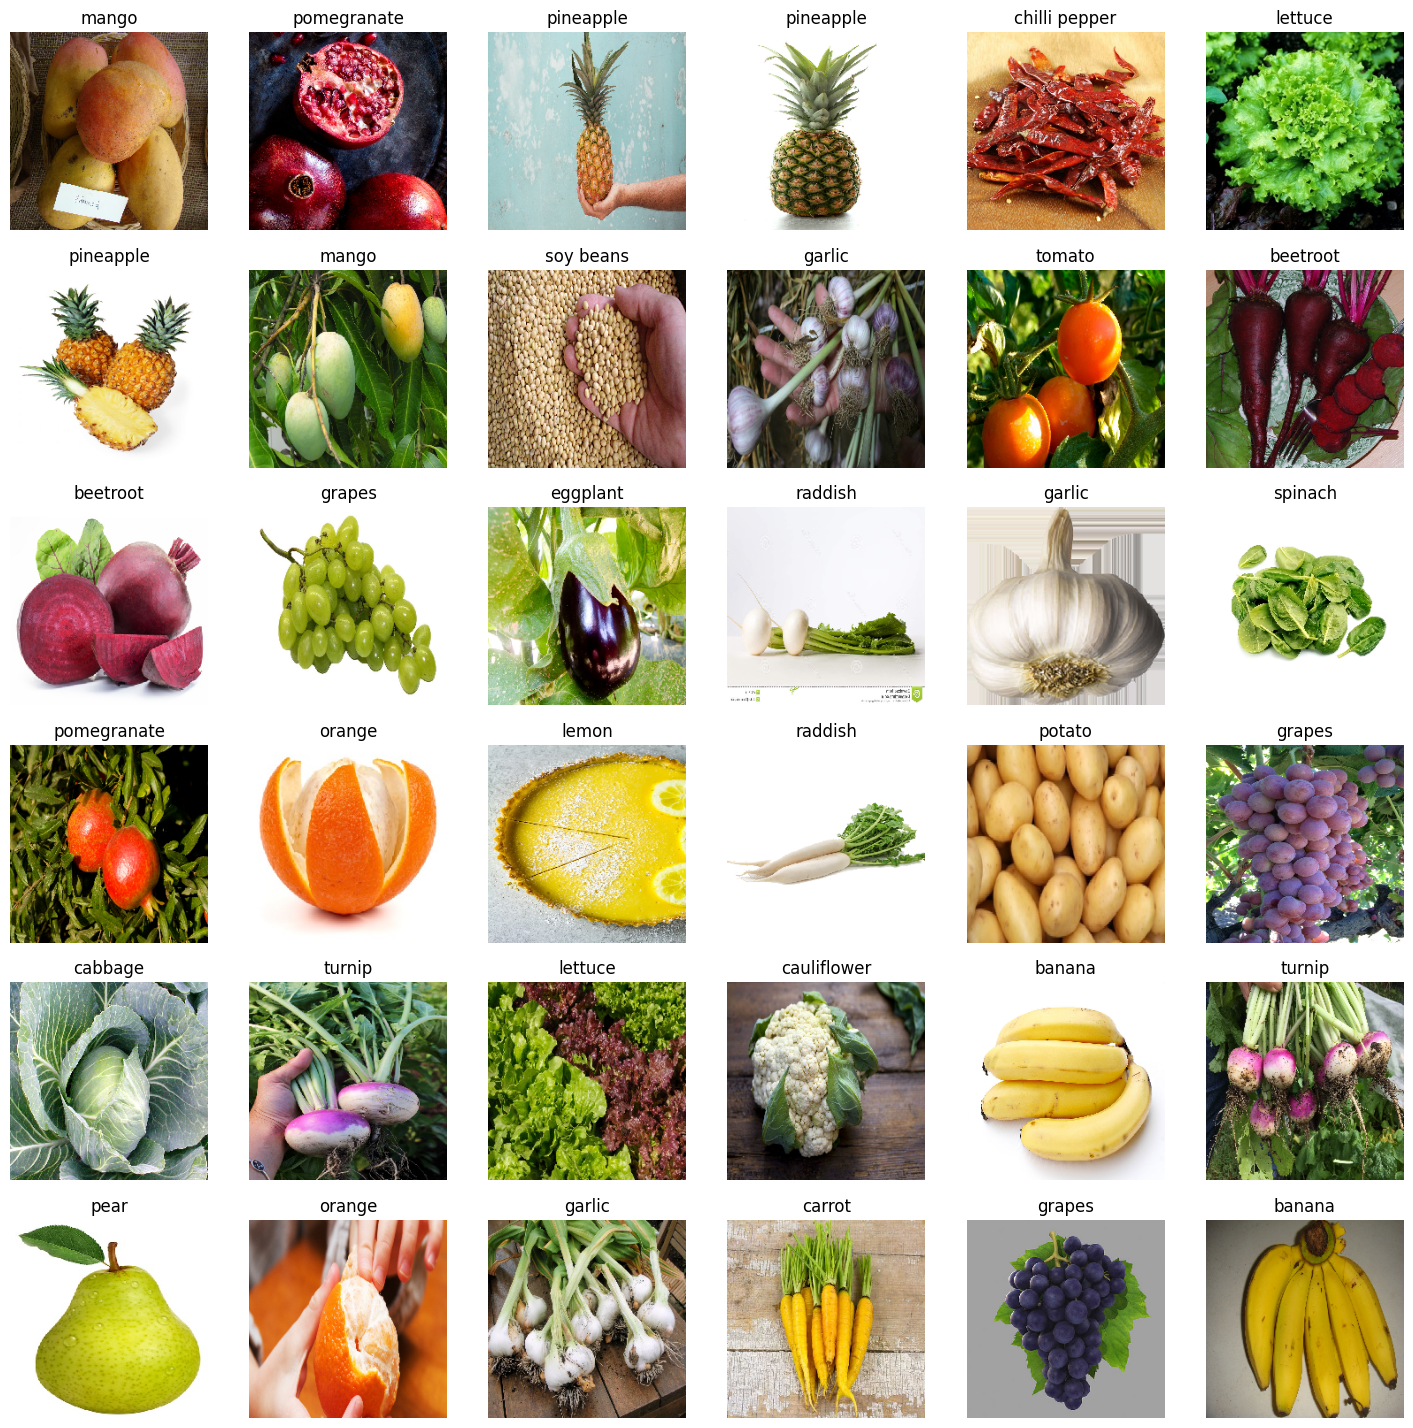

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 18))
images, labels = next(train_generator)
for i in range(36):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i])
    class_index = labels[i].argmax()
    class_name = list(train_generator.class_indices.keys())[class_index]
    plt.title(class_name)
    plt.axis("off")

plt.show()


In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(36, activation='softmax')
])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [50]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [51]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if (logs.get('accuracy') > 0.97 and logs.get('val_accuracy') > 0.97):
                print("\n Accuracy telah mencapai 97% atau lebih, menghentikan pelatihan ")
                self.model.stop_training = True

callback = myCallback()

In [52]:
history = model.fit(
          train_generator,
          steps_per_epoch=32,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=5,
          verbose=2,
          callbacks=[callback])

Epoch 1/30
32/32 - 42s - loss: 0.1726 - accuracy: 0.9514 - val_loss: 0.2688 - val_accuracy: 0.9563 - 42s/epoch - 1s/step
Epoch 2/30
32/32 - 36s - loss: 0.0857 - accuracy: 0.9709 - val_loss: 0.2775 - val_accuracy: 0.9438 - 36s/epoch - 1s/step
Epoch 3/30
32/32 - 35s - loss: 0.1004 - accuracy: 0.9722 - val_loss: 0.5373 - val_accuracy: 0.9438 - 35s/epoch - 1s/step
Epoch 4/30
32/32 - 35s - loss: 0.0950 - accuracy: 0.9718 - val_loss: 0.7588 - val_accuracy: 0.9500 - 35s/epoch - 1s/step
Epoch 5/30
32/32 - 36s - loss: 0.0874 - accuracy: 0.9809 - val_loss: 0.4988 - val_accuracy: 0.9438 - 36s/epoch - 1s/step
Epoch 6/30
32/32 - 38s - loss: 0.1303 - accuracy: 0.9683 - val_loss: 0.3867 - val_accuracy: 0.9250 - 38s/epoch - 1s/step
Epoch 7/30
32/32 - 35s - loss: 0.1935 - accuracy: 0.9523 - val_loss: 0.2955 - val_accuracy: 0.9625 - 35s/epoch - 1s/step
Epoch 8/30
32/32 - 37s - loss: 0.1299 - accuracy: 0.9709 - val_loss: 0.3496 - val_accuracy: 0.9563 - 37s/epoch - 1s/step
Epoch 9/30
32/32 - 38s - loss: 0

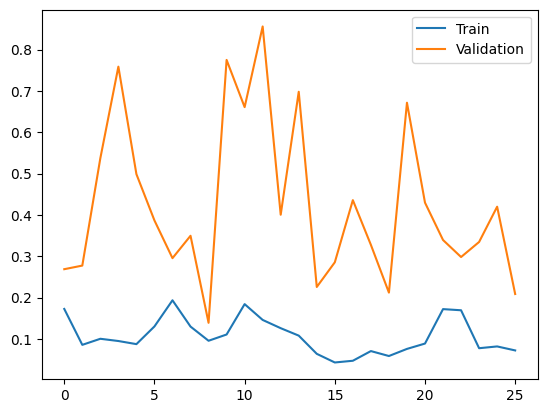

In [53]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()

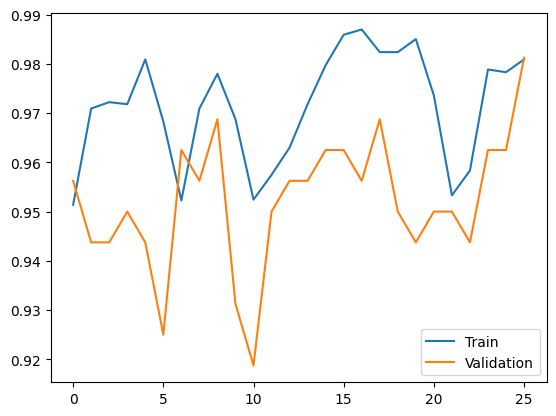

In [54]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()